In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
%pip install wordcloud

from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
# re module to use regular expression functions
import re
STOPWORDS = set(stopwords.words('english'))
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
data=pd.read_csv(r"amazon_alexa.tsv",delimiter='\t',quoting=3)
# r to read \ as \ and not escape ch. \t to separate at tabs as file is tab separated. quoting 3 to not quote any value

In [3]:
print(f"Dataset shape:{data.shape}")

Dataset shape:(4411, 5)


In [4]:
data.tail(10)

,rating,date,variation,verified_reviews,feedback
4401,4,30-Jul-18,White Dot,Barry,1.0
4402,3,30-Jul-18,Black Dot,,1.0
4403,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1.0
4404,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1.0
4405,5,30-Jul-18,Black Dot,love it,1.0
4406,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1.0
4407,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1.0
4408,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1.0
4409,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1.0
4410,2,29-Jul-18,Black Dot,not Good,0.0


In [5]:
print(f"Feature name:{data.columns.values}")

Feature name:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [6]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            1
dtype: int64

In [7]:
data = data.dropna(subset=["feedback"])

In [8]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback


In [9]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [10]:
data['Length']=data['verified_reviews'].apply(len)

In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1.0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1.0,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1.0,197
3,1,30-Jul-18,Charcoal Fabric,"""This thing is very bad! You should not get o...",0.0,65
4,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1.0,174


In [12]:
data.dtypes

rating                int64
date                 object
variation            object
verified_reviews     object
feedback            float64
Length                int64
dtype: object

In [13]:
print(f"rating value count:\n{data['rating'].value_counts()}")

rating value count:
5    2281
2    1267
4     453
1     257
3     152
Name: rating, dtype: int64


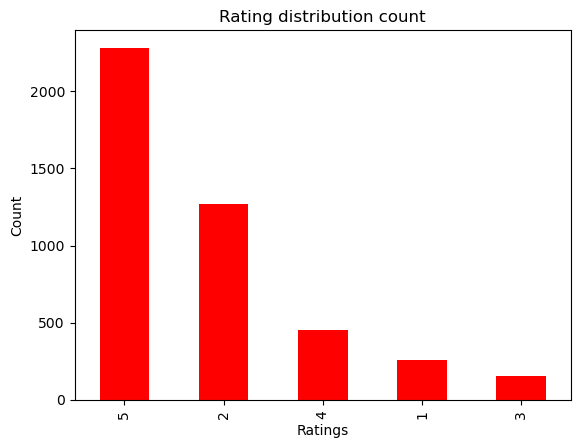

In [14]:
data['rating'].value_counts().plot.bar(color='red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [15]:
print(f"feedback value count:\n{data['feedback'].value_counts()}")

feedback value count:
1.0    2900
0.0    1510
Name: feedback, dtype: int64


In [16]:
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

"It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals."


In [17]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


<Axes: ylabel='Percentage wise distrubution of feedback'>

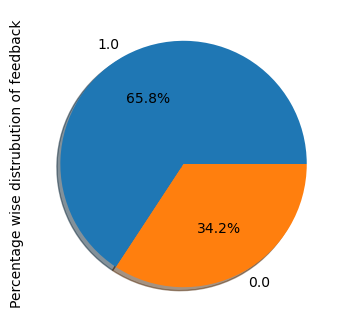

In [18]:
fig = plt.figure(figsize=(4,4))
tags = data['feedback'].value_counts()/data.shape[0]
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, label='Percentage wise distrubution of feedback')


In [19]:
data[data['feedback']==0]['rating'].value_counts()

2    1267
1     243
Name: rating, dtype: int64

In [20]:
data[data['feedback']==1]['rating'].value_counts()

5    2281
4     453
3     152
1      14
Name: rating, dtype: int64

In [21]:
print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
Sandstone Fabric                1127
Charcoal Fabric                  597
Black  Dot                       516
Configuration: Fire TV Stick     350
Black                            315
Black  Plus                      270
Black  Show                      265
Black  Spot                      241
White  Dot                       184
Heather Gray Fabric              159
White  Spot                      109
White                             91
White  Show                       85
White  Plus                       78
Oak Finish                        14
Walnut Finish                      9
Name: variation, dtype: int64


In [22]:
data.groupby('variation')['rating'].mean()

variation
Black                           3.815873
Black  Dot                      4.449612
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 3.822446
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.622642
Oak Finish                      4.857143
Sandstone Fabric                2.180124
Walnut Finish                   4.888889
White                           4.131868
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

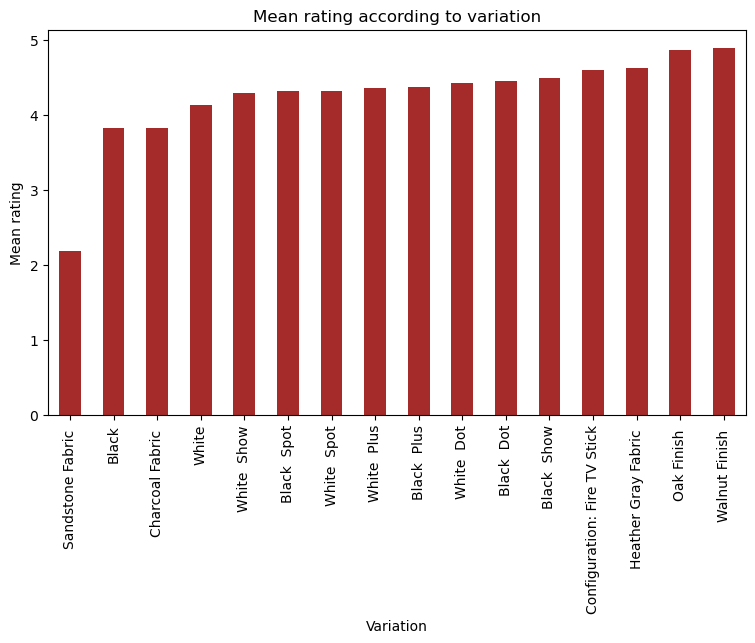

In [23]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(9, 5))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [24]:
data['Length'].describe()

count    4410.000000
mean      104.859637
std       160.963347
min         1.000000
25%        22.000000
50%        51.000000
75%       120.000000
max      2853.000000
Name: Length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

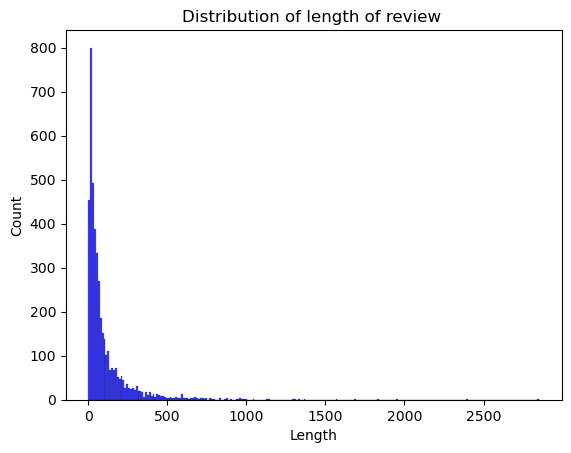

In [25]:
sns.histplot(data['Length'],color='blue').set(title='Distribution of length of review ')


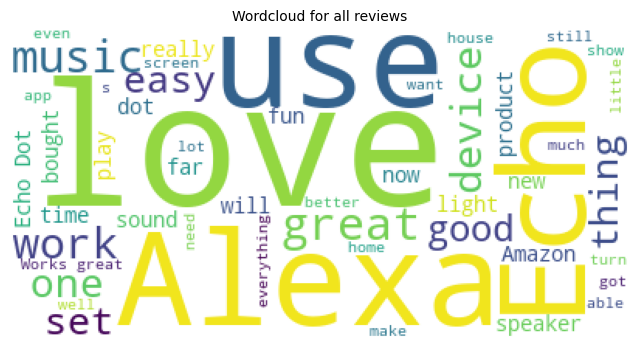

In [26]:
# join-joins all items of an iterable object into a string
reviews = " ".join([review for review in data['verified_reviews']])
# review for review in..... returns a list                     
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(8,18))
#show data as image
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [27]:
# combining all negative reviews into a string
neg_reviews=" ".join([review for review in data[data['feedback']==0]['verified_reviews']])
# making a list out of a string separated by whitespace
neg_reviews=neg_reviews.lower().split()

# combining all positive reviews into a string
pos_reviews=" ".join([review for review in data[data['feedback']==1]['verified_reviews']])
# making a list out of a string separated by whitespace
pos_reviews=pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback==0 category only
# made a list of negative reviews before to iterate over here
unique_negative = " ".join([x for x in neg_reviews if x not in pos_reviews])


#Finding words from reviews which are present in that feedback==1 category only
# made a list of positive reviews before to iterate over here
unique_positive = " ".join([x for x in pos_reviews if x not in neg_reviews])

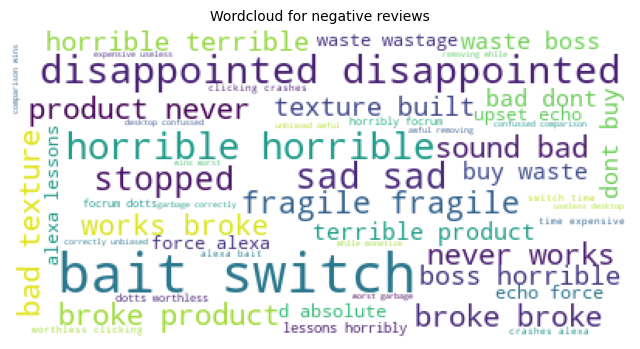

In [28]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

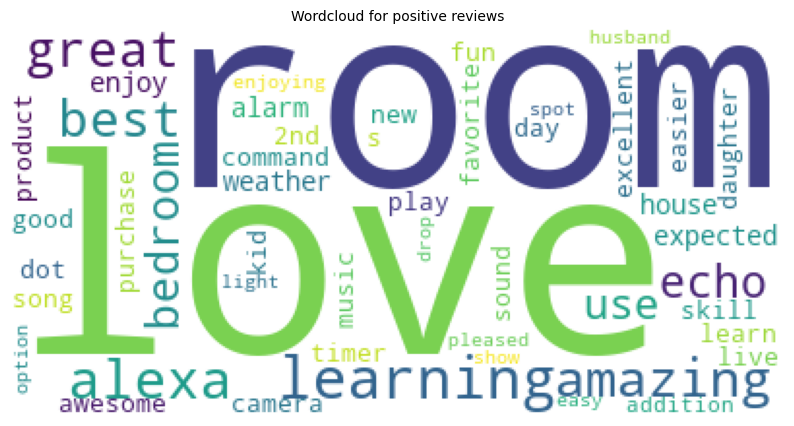

In [29]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [30]:
corpus = []
#stemmer object to covert words to their stem
stemmer = PorterStemmer()
#iterating over rows
for i in range(0, data.shape[0]):
  #returning review string by substituting non alphabets with space
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  #convert review string to lower case list with items separated by space
  review = review.lower().split()
  #make a list of stemmed words of a review in a row
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  #convert upper list to a string separated with space
  review = ' '.join(review)
  #append the converted review string to the corpus list as a list item
  corpus.append(review)

In [31]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'thing bad get one wast money',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fa

In [32]:
# cv instance to convert text to vector of word frequency
#cv creates a 2d array .each column head denotes a word. here max feature =2500 so most repeated 2500 words takeen.
# so 2500 colums created. each row denates a list item of corpus. for each item(or row) the cell is filled
# with the frequency of the word(denoted by column head) i.e the no. of times that word is present in the list item(i.e sentence i.e the review)
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
 # finds vector values for words(i.e frequency of word in a given list item(i.e sentence)) and transforms text to vector
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [33]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
#Saving the Count Vectorizer
#The pickle module implements binary protocols for serializing and de-serializing a Python object structure
#Serialization is the process of converting an object’s state(value or data) to a byte stream. This byte stream can then be saved to a file, sent over a network, or stored in a database.
#pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)
#Write the pickled(serialized) representation of the object obj to the open file object file
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [35]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4410, 2500)
y shape: (4410,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (3087, 2500)
y train: (3087,)
X test: (1323, 2500)
y test: (1323,)


In [37]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 10
X test max value: 12


In [38]:
#from medium -Scaling your data in machine learning (ML)is important because many algorithms use the Euclidean distance between two data points in their computations/derivations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm
#MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.
#For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies.
#By scaling your variables, you can help compare different variables on equal footing.
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [39]:
print(f"X train max value: {X_train_scl.max()}")

X train max value: 1.0


In [40]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [41]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [42]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9925494007126661
Testing Accuracy : 0.9516250944822373


In [43]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)


In [44]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

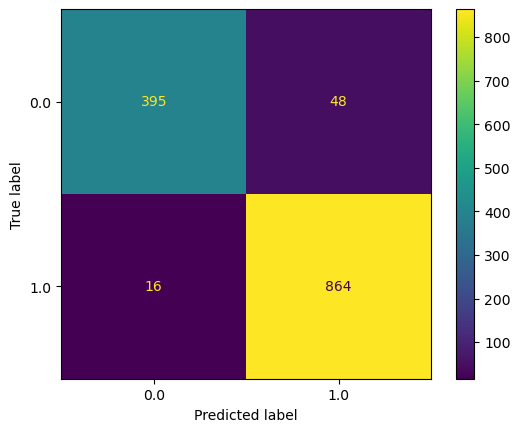

In [45]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [46]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9433100071449585
Standard Variance : 0.01187171316507743


In [47]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [48]:

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [49]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [50]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 97.06439211095403
Cross validation mean accuracy on test set : 91.0387385871007
Accuracy score for test set : 0.9516250944822373


In [51]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.938127632005183
Testing Accuracy : 0.90854119425548


In [53]:
y_preds = model_xgb.predict(X_test)

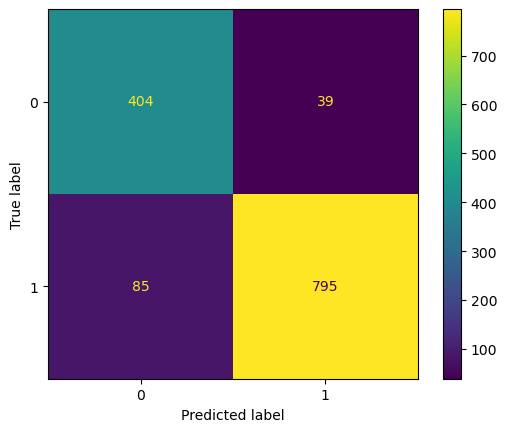

In [54]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [55]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

In [56]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [57]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9925494007126661
Testing Accuracy : 0.9334845049130763


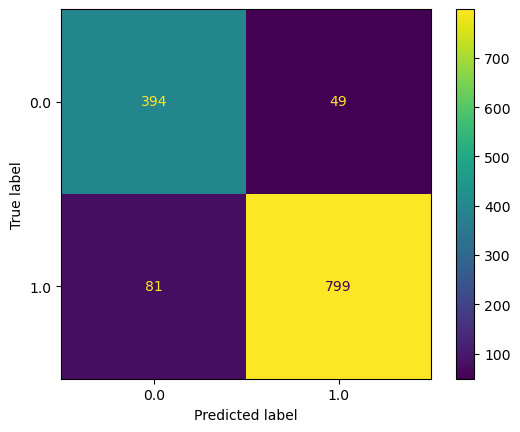

In [58]:
y_preds = model_dt.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()